# NEED TO ADD
# Add introduction to project, and what models we used; examples heart diesease (github link) & cancer (module 4) 

In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection, metrics, preprocessing
from sklearn.decomposition import PCA
from sklearn import tree

import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO
#import pydotplus //maybe need it later
from IPython.display import Image

# NEED TO ADD
# replace description below with file description from cance module 4 

In [11]:
''''
Data fields
Here's a brief version of what you'll find in the data description file.

SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
''''

SyntaxError: EOL while scanning string literal (<ipython-input-11-42dfaabf7449>, line 85)

# Need to change
# udpate wording and add description
# Deleted the attributes with null values > 2000 & if any row has a blank cell

In [12]:
raw_df = pd.read_csv('/Applications/2_NJMJ-master/Group/housingdata.csv')
raw_df.drop(columns=['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
raw_df.dropna(inplace=True)

print(raw_df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   
6   7          20       RL         75.0    10084   Pave      Reg         Lvl   

  Utilities LotConfig    ...     EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
1    AllPub       FR2    ...                 0         0           0        0   
2    AllPub    Inside    ...                 0         0           0        0   
3    AllPub    Corner    ...               272         0           0        0   
4    AllPub       FR2    ...                 0         0           0        0   
6    AllPub    Inside    ...                 0         0           0        0   

  MiscVal MoSold  Soldfrom  Sale

# table below shows the data after removing null values 
# add more description 

# descriptive statisitics 1; data is not clean; still using original data (still have text values)
# add 4 - 5 charts that would give meaning to the project and brief description

In [13]:
def col_count_plot(col):
    data = raw_df[col]
    names = data.value_counts().index
    values = data.value_counts().values
    pos = range(len(values))
    plt.bar(pos, values)
    plt.xticks(pos, names)
    plt.ylabel('Count')
    plt.title(col)
    plt.show()

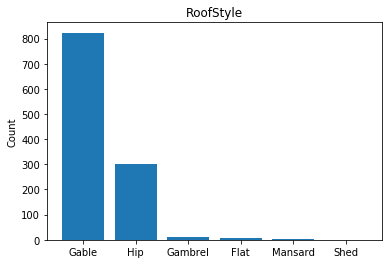

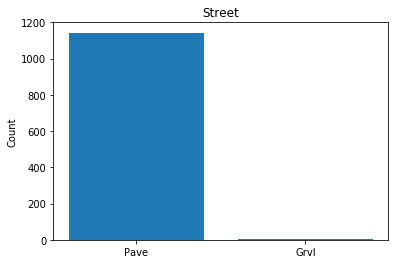

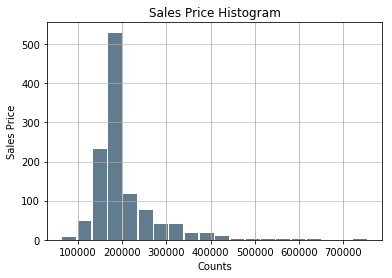

In [14]:
#bar charts
col_count_plot('RoofStyle') 
col_count_plot('Street') 

#histogram chart
raw_df.iloc[:,76].hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')
plt.title('Sales Price Histogram')
plt.xlabel('Counts')
plt.ylabel('Sales Price')
plt.grid(axis='y', alpha=0.75)

# Coding Categorical Data
# Marc Edit

In [15]:
#print(raw_df.dtypes) 
#shows all types of each attribute

raw_df['MSZoning'] = raw_df['MSZoning'].astype('category')
raw_df['Street'] = raw_df['Street'].astype('category')
raw_df['LotShape'] = raw_df['LotShape'].astype('category')
raw_df['LandContour'] = raw_df['LandContour'].astype('category')
raw_df['Utilities'] = raw_df['Utilities'].astype('category')
raw_df['LotConfig'] = raw_df['LotConfig'].astype('category')
raw_df['LandSlope'] = raw_df['LandSlope'].astype('category')
raw_df['Neighborhood'] = raw_df['Neighborhood'].astype('category')
raw_df['Condition1'] = raw_df['Condition1'].astype('category')
raw_df['Condition2'] = raw_df['Condition2'].astype('category')
raw_df['BldgType'] = raw_df['BldgType'].astype('category')
raw_df['HouseStyle'] = raw_df['HouseStyle'].astype('category')
raw_df['RoofStyle'] = raw_df['RoofStyle'].astype('category')
raw_df['RoofMatl'] = raw_df['RoofMatl'].astype('category')
raw_df['Exterior1st'] = raw_df['Exterior1st'].astype('category')
raw_df['Exterior2nd'] = raw_df['Exterior2nd'].astype('category')
raw_df['MasVnrType'] = raw_df['MasVnrType'].astype('category')
raw_df['ExterQual'] = raw_df['ExterQual'].astype('category')
raw_df['ExterCond'] = raw_df['ExterCond'].astype('category')
raw_df['Foundation'] = raw_df['Foundation'].astype('category')
raw_df['BsmtQual'] = raw_df['BsmtQual'].astype('category')
raw_df['BsmtCond'] = raw_df['BsmtCond'].astype('category')
raw_df['BsmtExposure'] = raw_df['BsmtExposure'].astype('category')
raw_df['BsmtFinType1'] = raw_df['BsmtFinType1'].astype('category')
raw_df['BsmtFinType2'] = raw_df['BsmtFinType2'].astype('category')
raw_df['Heating'] = raw_df['Heating'].astype('category')
raw_df['HeatingQC'] = raw_df['HeatingQC'].astype('category')
raw_df['CentralAir'] = raw_df['CentralAir'].astype('category')
raw_df['Electrical'] = raw_df['Electrical'].astype('category')
raw_df['KitchenQual'] = raw_df['KitchenQual'].astype('category')
raw_df['Functional'] = raw_df['Functional'].astype('category')
raw_df['FireplaceQu'] = raw_df['FireplaceQu'].astype('category')
raw_df['GarageType'] = raw_df['GarageType'].astype('category')
raw_df['GarageFinish'] = raw_df['GarageFinish'].astype('category')
raw_df['GarageQual'] = raw_df['GarageQual'].astype('category')
raw_df['GarageCond'] = raw_df['GarageCond'].astype('category')
raw_df['PavedDrive'] = raw_df['PavedDrive'].astype('category')
raw_df['SaleType'] = raw_df['SaleType'].astype('category')
raw_df['SaleCondition'] = raw_df['SaleCondition'].astype('category')
#change 'street' to new attribute name

raw_df['MSZoning_Cat'] = raw_df['MSZoning'].cat.codes
raw_df['Street_Cat'] = raw_df['Street'].cat.codes
raw_df['LotShape_Cat'] = raw_df['LotShape'].cat.codes
raw_df['LandContour_Cat'] = raw_df['LandContour'].cat.codes
raw_df['Utilities_Cat'] = raw_df['Utilities'].cat.codes
raw_df['LotConfig_Cat'] = raw_df['LotConfig'].cat.codes
raw_df['LandSlope_Cat'] = raw_df['LandSlope'].cat.codes
raw_df['Neighborhood_Cat'] = raw_df['Neighborhood'].cat.codes
raw_df['Condition1_Cat'] = raw_df['Condition1'].cat.codes
raw_df['Condition2_Cat'] = raw_df['Condition2'].cat.codes
raw_df['BldgType_Cat'] = raw_df['BldgType'].cat.codes
raw_df['HouseStyle_Cat'] = raw_df['HouseStyle'].cat.codes
raw_df['RoofStyle_Cat'] = raw_df['RoofStyle'].cat.codes
raw_df['RoofMatl_Cat'] = raw_df['RoofMatl'].cat.codes
raw_df['Exterior1st_Cat'] = raw_df['Exterior1st'].cat.codes
raw_df['Exterior2nd_Cat'] = raw_df['Exterior2nd'].cat.codes
raw_df['MasVnrType_Cat'] = raw_df['MasVnrType'].cat.codes
raw_df['ExterQual_Cat'] = raw_df['ExterQual'].cat.codes
raw_df['ExterCond_Cat'] = raw_df['ExterCond'].cat.codes
raw_df['Foundation_Cat'] = raw_df['Foundation'].cat.codes
raw_df['BsmtQual_Cat'] = raw_df['BsmtQual'].cat.codes
raw_df['BsmtCond_Cat'] = raw_df['BsmtCond'].cat.codes
raw_df['BsmtExposure_Cat'] = raw_df['BsmtExposure'].cat.codes
raw_df['BsmtFinType1_Cat'] = raw_df['BsmtFinType1'].cat.codes
raw_df['BsmtFinType2_Cat'] = raw_df['BsmtFinType2'].cat.codes
raw_df['Heating_Cat'] = raw_df['Heating'].cat.codes
raw_df['HeatingQC_Cat'] = raw_df['HeatingQC'].cat.codes
raw_df['CentralAir_Cat'] = raw_df['CentralAir'].cat.codes
raw_df['Electrical_Cat'] = raw_df['Electrical'].cat.codes
raw_df['KitchenQual_Cat'] = raw_df['KitchenQual'].cat.codes
raw_df['Functional_Cat'] = raw_df['Functional'].cat.codes
raw_df['FireplaceQu_Cat'] = raw_df['FireplaceQu'].cat.codes
raw_df['GarageType_Cat'] = raw_df['GarageType'].cat.codes
raw_df['GarageFinish_Cat'] = raw_df['GarageFinish'].cat.codes
raw_df['GarageQual_Cat'] = raw_df['GarageQual'].cat.codes
raw_df['GarageCond_Cat'] = raw_df['GarageCond'].cat.codes
raw_df['PavedDrive_Cat'] = raw_df['PavedDrive'].cat.codes
raw_df['SaleType_Cat'] = raw_df['SaleType'].cat.codes
raw_df['SaleCondition_Cat'] = raw_df['SaleCondition'].cat.codes
#keep same naming attribute_cat 
#change 'street' to new attribtue name

#print(raw_df)
#show that new column was added -> 39 new columns added (77 originally; 116 total)
          
''

''

In [19]:
raw_df.drop(columns=['MSZoning'],inplace=True)
raw_df.drop(columns=['Street'],inplace=True)
raw_df.drop(columns=['LotShape'],inplace=True)
raw_df.drop(columns=['LandContour'],inplace=True)
raw_df.drop(columns=['Utilities'],inplace=True)
raw_df.drop(columns=['LotConfig'],inplace=True)
raw_df.drop(columns=['LandSlope'],inplace=True)
raw_df.drop(columns=['Neighborhood'],inplace=True)
raw_df.drop(columns=['Condition1'],inplace=True)
raw_df.drop(columns=['Condition2'],inplace=True)
raw_df.drop(columns=['BldgType'],inplace=True)
raw_df.drop(columns=['HouseStyle'],inplace=True)
raw_df.drop(columns=['RoofStyle'],inplace=True)
raw_df.drop(columns=['RoofMatl'],inplace=True)
raw_df.drop(columns=['Exterior1st'],inplace=True)
raw_df.drop(columns=['Exterior2nd'],inplace=True)
raw_df.drop(columns=['MasVnrType'],inplace=True)
raw_df.drop(columns=['ExterQual'],inplace=True)
raw_df.drop(columns=['ExterCond'],inplace=True)
raw_df.drop(columns=['Foundation'],inplace=True)
raw_df.drop(columns=['BsmtQual'],inplace=True)
raw_df.drop(columns=['BsmtCond'],inplace=True)
raw_df.drop(columns=['BsmtExposure'],inplace=True)
raw_df.drop(columns=['BsmtFinType1'],inplace=True)
raw_df.drop(columns=['BsmtFinType2'],inplace=True)
raw_df.drop(columns=['Heating'],inplace=True)
raw_df.drop(columns=['HeatingQC'],inplace=True)
raw_df.drop(columns=['CentralAir'],inplace=True)
raw_df.drop(columns=['Electrical'],inplace=True)
raw_df.drop(columns=['KitchenQual'],inplace=True)
raw_df.drop(columns=['Functional'],inplace=True)
raw_df.drop(columns=['FireplaceQu'],inplace=True)
raw_df.drop(columns=['GarageType'],inplace=True)
raw_df.drop(columns=['GarageFinish'],inplace=True)
raw_df.drop(columns=['GarageQual'],inplace=True)
raw_df.drop(columns=['GarageCond'],inplace=True)
raw_df.drop(columns=['PavedDrive'],inplace=True)
raw_df.drop(columns=['SaleType'],inplace=True)
raw_df.drop(columns=['SaleCondition'],inplace=True)
#drop old columns


KeyError: "['MSZoning'] not found in axis"

# Dividing the Data set into Testing and Training:
# nesreen
##### 20% testing, and 80% training


In [17]:

x=raw_df[raw_df.columns[:-1]]
y= np.array(raw_df['SalePrice'])
#print x.values, y

X_train, X_test, y_train, y_test = model_selection.train_test_split(x.values, y, test_size=0.25, random_state=1145)
print(len(X_train), len(X_test), len(y_train), len(y_test))


858 287 858 287


In [19]:
#Normalization 
#waiting for coding to change from cat to num
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

ValueError: could not convert string to float: 'RL'

## Logistic Regression

In [20]:
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(model.predict_proba(X_test))
print(model.coef_)

/Users/RiceAllDay/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'RL'

In [9]:
metrics.confusion_matrix(y_test, y_pred)
#            Predict No     Predict Yes
#Actual No
#Actual Yes

NameError: name 'y_test' is not defined

In [10]:
def logistic_scoring(X, y, scoring, seed=7):
    kfold = model_selection.KFold(n_splits=5, random_state=seed)
    model = LogisticRegression()
    results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    print("{0}: {1:.3f} ({2:.3f})".format(scoring, results.mean(), results.std()))

In [11]:
logistic_scoring(X, y, 'accuracy')
logistic_scoring(X, y, 'neg_log_loss')
logistic_scoring(X, y, 'roc_auc')

NameError: name 'X' is not defined